In [16]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [14, 7]
plt.rcParams['figure.dpi'] = 300

PATH_SLC_1 = '/Users/jeong/Documents/OPERA_SCRATCH/CSLC/CSLC_BETA_DELIVERY/CSLC_outputs_from_different_envs/output_s1_cslc.docker.ol8.2022_1221/t064_135518_iw1/20220501/t064_135518_iw1_20220501_VV.h5'
PATH_SLC_2 = '/Users/jeong/Documents/OPERA_SCRATCH/CSLC/CSLC_BETA_DELIVERY/CSLC_outputs_from_different_envs/output_s1_cslc.docker.nisar.2022_1221/t064_135518_iw1/20220501/t064_135518_iw1_20220501_VV.h5'
PATH_SLC_3 = '/Users/jeong/Documents/OPERA_SCRATCH/CSLC/CSLC_BETA_DELIVERY/CSLC_outputs_from_different_envs/output_s1_cslc.docker.mac.2022_1221/t064_135518_iw1/20220501/t064_135518_iw1_20220501_VV.h5'
PATH_SLC_4 = '/Users/jeong/Documents/OPERA_SCRATCH/CSLC/CSLC_BETA_DELIVERY/CSLC_outputs_from_different_envs/output_s1_cslc.aurora.2022_1221/t064_135518_iw1/20220501/t064_135518_iw1_20220501_VV.h5'
PATH_SLC_5 = '/Users/jeong/Documents/OPERA_SCRATCH/CSLC/CSLC_BETA_DELIVERY/CSLC_outputs_from_different_envs/output_s1_cslc.aurora.2022_1221_ver2/t064_135518_iw1/20220501/t064_135518_iw1_20220501_VV.h5'
PATH_SLC_6 = '/Users/jeong/Documents/OPERA_SCRATCH/CSLC/CSLC_BETA_DELIVERY/CSLC_outputs_from_different_envs/output_s1_cslc.docker.ubuntu.2022_1221/t064_135518_iw1/20220501/t064_135518_iw1_20220501_VV.h5'
PATH_SLC_7 = '/Users/jeong/Downloads/cslc_beta_acceptance_test_sample_result/output_s1_cslc/t064_135518_iw1/20220501/t064_135518_iw1_20220501_VV.h5'


#list_path_slc = [PATH_SLC_1,
#                 PATH_SLC_2]
list_path_slc = [PATH_SLC_1,
                 PATH_SLC_7]


list_description = ['Golden dataset',
                    'SDS output']

vec_bin = np.arange(0, 0.005, 1.0e-7)

def get_hist_rdiff(slc_ref: np.ndarray, slc_sec: np.ndarray, vec_bin = vec_bin):
    rdiff_real = np.abs((slc_sec.real - slc_ref.real) / slc_ref.real)
    rdiff_imag = np.abs((slc_sec.imag - slc_ref.imag) / slc_ref.imag)

    vec_bin = np.arange(0,0.005,1.0e-7)
    hist_real = np.histogram(rdiff_real, vec_bin)
    hist_imag = np.histogram(rdiff_imag, vec_bin)

    return hist_real, hist_imag, (np.nanmax(rdiff_real), np.nanmax(rdiff_imag))




In [17]:
# load the SLC
list_slc = []

for path_slc in list_path_slc:
    with h5py.File(path_slc, 'r') as hin:
        list_slc.append(np.array(hin['/science/SENTINEL1/CSLC/grids/VV']))

# Calculate histogram
list_hist = []
for i in range(len(list_path_slc)-1):
    print(f'Calculating histogram: {i+1} of {len(list_path_slc)-1}')
    list_hist.append(get_hist_rdiff(list_slc[0], list_slc[i+1], vec_bin))


Calculating histogram: 1 of 1


/var/folders/sg/mlt_rh_n7_v21pg1p3nhg5800000gr/T/ipykernel_71725/4000673189.py:29: RuntimeWarning: invalid value encountered in divide
  rdiff_real = np.abs((slc_sec.real - slc_ref.real) / slc_ref.real)


0.0006


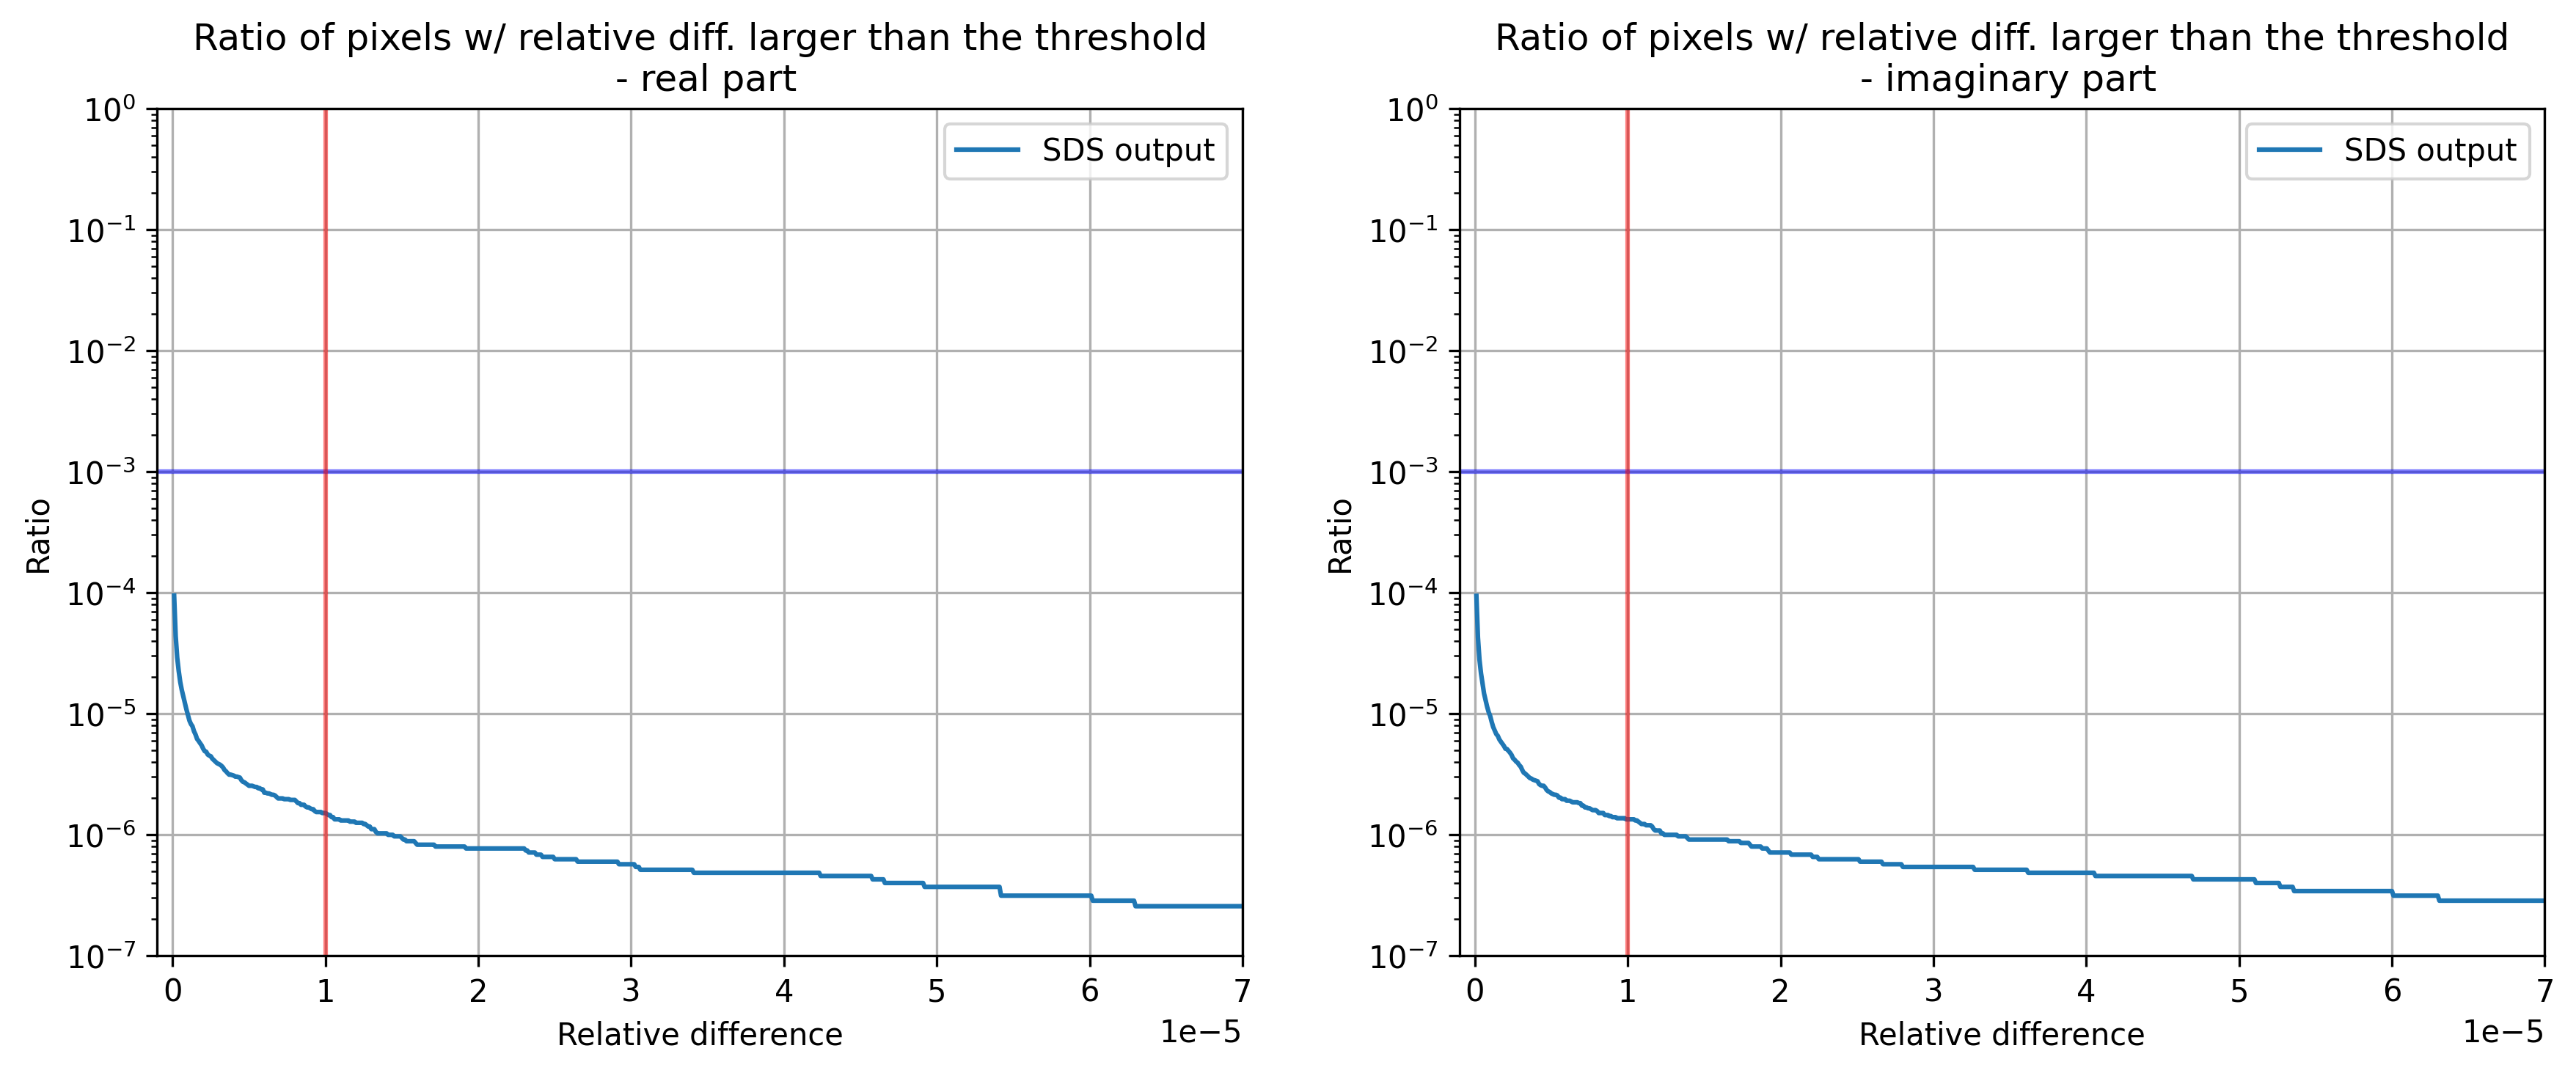

In [15]:
plt.rcParams['figure.figsize'] = [14, 5]

xmin_plot = -1.0e-6
xmax_plot = 7.0e-5
ymin_plot = 1.0e-7
ymax_plot = 1.0
tot_pixels_ref = np.count_nonzero(~np.isnan(np.abs(list_slc[0])))

plt.subplot(1,2,1)
for i, hist in enumerate(list_hist):
    cumsum = np.cumsum(hist[0][0])
    plt.plot(vec_bin[1:], 1 - cumsum / tot_pixels_ref)
    #plt.plot(vec_bin[1:], 1 - list_hist_cumsum[0][0] / tot_pixels_ref,'k')
plt.plot([xmin_plot, xmax_plot], [0.001, 0.001], 'b', alpha = 0.5)
plt.plot([1.0e-5, 1.0e-5], [ymin_plot, ymax_plot], 'r', alpha = 0.5)
plt.yscale('log')
plt.xlim([xmin_plot, xmax_plot])
plt.ylim([ymin_plot, ymax_plot])
plt.title(f'Ratio of pixels w/ relative diff. larger than the threshold\n - real part')
#plt.title(f'Rel. diff. Real part. max = {np.nanmax(rdiff_imag):e}')
plt.xlabel('Relative difference')
plt.ylabel('Ratio')
plt.legend(list_description[1:])
plt.grid()

plt.subplot(1,2,2)
for i, hist in enumerate(list_hist):
    cumsum = np.cumsum(hist[1][0])
    plt.plot(vec_bin[1:], 1 - cumsum / tot_pixels_ref)
plt.plot([xmin_plot, xmax_plot], [0.001, 0.001], 'b', alpha = 0.5)
plt.plot([1.0e-5, 1.0e-5], [ymin_plot, ymax_plot], 'r', alpha = 0.5)
plt.yscale('log')
plt.xlim([xmin_plot, xmax_plot])
plt.ylim([ymin_plot, ymax_plot])
plt.title(f'Ratio of pixels w/ relative diff. larger than the threshold\n - imaginary part')
plt.xlabel('Relative difference')
plt.ylabel('Ratio')
plt.legend(list_description[1:])
plt.grid()

print(vec_bin[6000])

In [7]:
print(1 - cumsum / tot_pixels_ref)
print(vec_bin)
print(tot_pixels_ref)
print(cumsum[-10:]/ tot_pixels_ref)
print(cumsum[:10]/ tot_pixels_ref)

print(list_hist[0][0][0])
print(list_hist[0][0][1])

print(vec_bin[1])


[0. 0. 0. ... 0. 0. 0.]
[0.0000e+00 1.0000e-07 2.0000e-07 ... 4.9997e-03 4.9998e-03 4.9999e-03]
35044028
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[35044027        0        0 ...        0        0        0]
[0.0000e+00 1.0000e-07 2.0000e-07 ... 4.9997e-03 4.9998e-03 4.9999e-03]
1e-07


NameError: name 'rdiff_real' is not defined